This is a bonus notebook that shows how we can implement convolution simply (if somewhat inefficiently) using strided memory to create "virtual" arrays against which to apply a convolution kernel.

In [ ]:
from scipy.signal import convolve2d

In [47]:
data = np.arange(5)
data

array([0, 1, 2, 3, 4])

In [50]:
np.vstack([data, data, data]).strides

(40, 8)

In [52]:
np.lib.stride_tricks.as_strided(data, shape=(3, 3), strides=(8, 8))

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [ ]:
kernel = np.eye(3)
kernel

In [ ]:
convolve2d(data, kernel, mode='valid')

In [43]:
import numpy as np
data = np.arange(12).reshape(2, 2, 3)
data

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [44]:
data.data.tobytes()

b'\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\n\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00'

In [45]:
data.shape

(2, 2, 3)

In [46]:
data.strides

(48, 24, 8)

In [53]:
import numpy as np
from matplotlib.pyplot import imshow
from numpy.lib.stride_tricks import as_strided

data = np.arange(30).reshape(6, 5)
kernel = np.eye(3)


def extrude_for_convolution(data, kernel):
    # Indices of the top left corner of the last window.
    last_row = data.shape[0] - (kernel.shape[0])
    last_col = data.shape[1] - (kernel.shape[1])

    num_windows = last_row * data.shape[1] + last_col + 1

    shape = (num_windows,) + kernel.shape
    strides = (data.strides[1],) + data.strides

    # This is where the magic happens.
    windows = as_strided(data, shape=shape, strides=strides)
    
    # 
    valid = np.arange(num_windows) % data.shape[1] <= last_col

    return windows, valid


def convolve_2d(data, kernel):
    windows, valid = extrude_for_convolution(data, kernel)

    # A 1D array containing the results of multiplying each window by the
    # convolution kernel.
    multiplication_results = np.tensordot(windows, kernel)[valid]

    return multiplication_results.reshape(data.shape[0] - kernel.shape[0] + 1,
                                          data.shape[1] - kernel.shape[1] + 1)

In [54]:
from skimage.data import horse
image = horse()
image.shape

(328, 400)

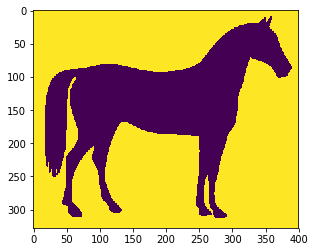

In [55]:
imshow(image)

In [56]:
from scipy.signal import gaussian
kernel = gaussian(3, 1) + gaussian(3, 1)[:, np.newaxis]
kernel

array([[1.21306132, 1.60653066, 1.21306132],
       [1.60653066, 2.        , 1.60653066],
       [1.21306132, 1.60653066, 1.21306132]])

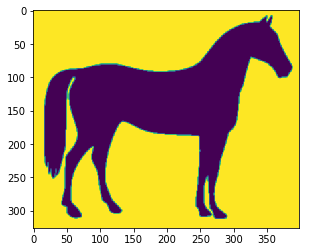

In [57]:
blurred = convolve_2d(image, kernel)
imshow(blurred)